# Load Dataset

In [17]:
import pandas as pd
import os
import numpy as np
from pprint import pprint

In [30]:
from pathlib import Path

def load_data(directory, nrows=1000):
# Read each CSV file in dir "path/to/root_dir"
    dfs = []
    for file in Path(directory).glob('**/*.csv'):
        dfs.append(pd.read_csv(file, nrows=nrows))
    # Put the dataframes to a single dataframe
    df = pd.concat(dfs, ignore_index=True)
    return df

benign_dir = os.path.join(os.getcwd(), 'dataset', 'Benign')
malware_dir = os.path.join(os.getcwd(), 'dataset', 'Malware')

benign_df = load_data(benign_dir, nrows=100)
malware_df = load_data(malware_dir, nrows=400)

df = pd.concat([benign_df, malware_df], ignore_index=True)
# trim columns labels
df.columns = df.columns.str.strip()

In [31]:
df.shape

(298501, 85)

<Axes: xlabel='Label', ylabel='# occurrences'>

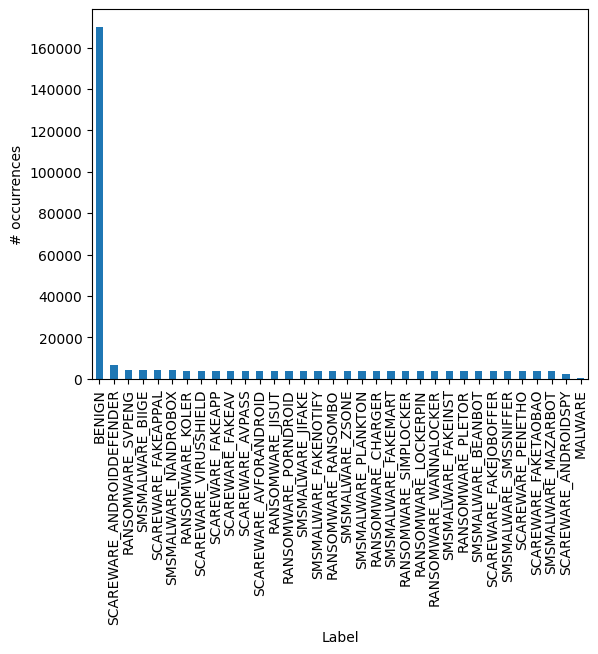

In [32]:
df["Label"].value_counts().plot(
    kind="bar",
    xlabel="Label",
    ylabel="# occurrences"
)

In [33]:
df["Label"] = df["Label"].apply(lambda x: 'MALWARE' if x != 'BENIGN' else x)

<Axes: xlabel='Label', ylabel='# occurrences'>

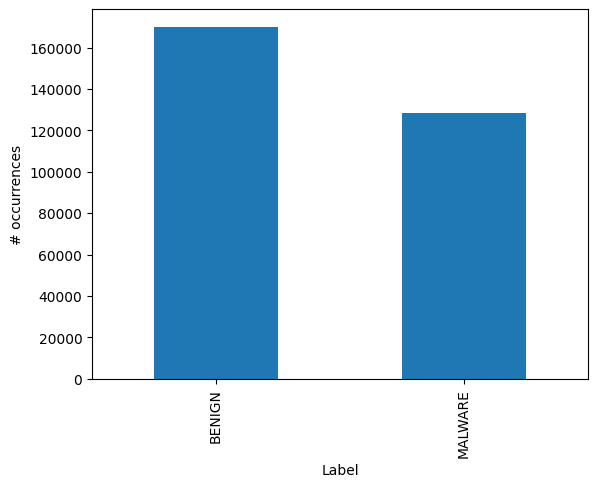

In [34]:
df["Label"].value_counts().plot(
    kind="bar",
    xlabel="Label",
    ylabel="# occurrences"
)

In [36]:
# shuffle dataset
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,172.217.6.206-10.42.0.211-443-37030-6,10.42.0.211,37030,172.217.6.206,443,6,21/06/2017 07:39:22,9295273,9,9,...,32,345724.0,0.0,345724.0,345724.0,8912223.0,0.0,8912223.0,8912223.0,BENIGN
1,172.217.12.161-10.42.0.42-443-41215-6,10.42.0.42,41215,172.217.12.161,443,6,16/08/2017 04:05:43,1360143,65,85,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MALWARE
2,183.3.235.80-10.42.0.151-80-45077-6,10.42.0.151,45077,183.3.235.80,80,6,30/06/2017 08:51:01,7467727,2,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MALWARE
3,10.42.0.151-54.192.36.136-38116-80-6,10.42.0.151,38116,54.192.36.136,80,6,22/06/2017 03:28:23,182673,23,22,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MALWARE
4,182.22.24.252-10.42.0.42-443-35901-6,10.42.0.42,35901,182.22.24.252,443,6,02/07/2017 05:32:30,479759,8,6,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


# Data Preprocessing

In [37]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

df['Source IP'] = label_encoder.fit_transform(df['Source IP'])
df['Flow ID'] = label_encoder.fit_transform(df['Flow ID'])
df['Destination IP'] = label_encoder.fit_transform(df['Destination IP'])

# drop column Timestamp
df = df.drop(['Timestamp'], axis=1)
df = df.dropna()

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['Label'], axis=1),
    df['Label'],
    test_size=0.4,
    random_state=42
)

#p = 0.8
#train_df, test_df = df[:int(len(df)*p)], df[int(len(df)*p):]

X_train.shape, X_test.shape

((179100, 83), (119401, 83))

In [39]:
X_train.head()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
100292,134973,9,41240,2053,443,6,1839762,3,0,0.0,...,0,32,0.000000e+00,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0
179055,54429,10,51497,671,80,6,940585,3,4,573.0,...,1,20,0.000000e+00,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0
293578,83441,8,51407,1510,443,6,34,1,1,55.0,...,0,32,0.000000e+00,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0
250734,151611,8,58172,2368,443,6,3804,2,0,0.0,...,0,20,0.000000e+00,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0
273766,144276,1301,64780,14,54681,6,63743129,31,26,10773.0,...,16,32,1.469315e+06,980632.474854,2097430.0,339326.0,19744163.0,1.161910e+07,30569746.0,7467810.0


# Decision Tree

In [40]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

[Text(0.5, 0.875, 'Flow ID <= 15219.5\ngini = 0.49\nsamples = 179100\nvalue = [102224, 76876]\nclass = BENIGN'),
 Text(0.25, 0.625, 'Fwd Packet Length Std <= 8.132\ngini = 0.485\nsamples = 17874\nvalue = [7402, 10472]\nclass = MALWARE'),
 Text(0.125, 0.375, 'Fwd IAT Total <= 1127093.0\ngini = 0.446\nsamples = 9649\nvalue = [3242, 6407]\nclass = MALWARE'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'Bwd IAT Max <= 281804.5\ngini = 0.5\nsamples = 8225\nvalue = [4160, 4065]\nclass = BENIGN'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Fwd IAT Mean <= 7490.286\ngini = 0.484\nsamples = 161226\nvalue = [94822, 66404]\nclass = BENIGN'),
 Text(0.625, 0.375, 'Bwd Packets/s <= 2919.714\ngini = 0.446\nsamples = 47273\nvalue = [31423, 15850]\nclass = BENIGN'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Init_Win_bytes_forward <= 675.5\

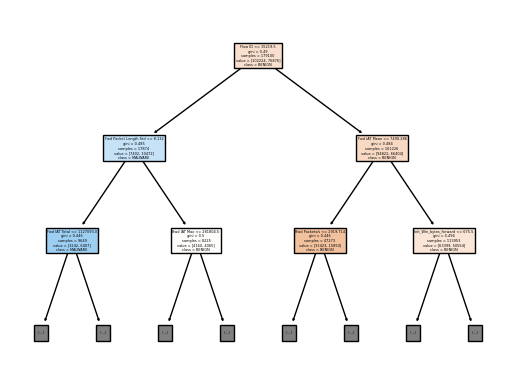

In [41]:
tree.plot_tree(clf, filled=True, class_names=clf.classes_, feature_names=X_train.columns, max_depth=2)

              precision    recall  f1-score   support

      BENIGN       0.79      0.77      0.78     67776
     MALWARE       0.71      0.74      0.72     51625

    accuracy                           0.76    119401
   macro avg       0.75      0.76      0.75    119401
weighted avg       0.76      0.76      0.76    119401



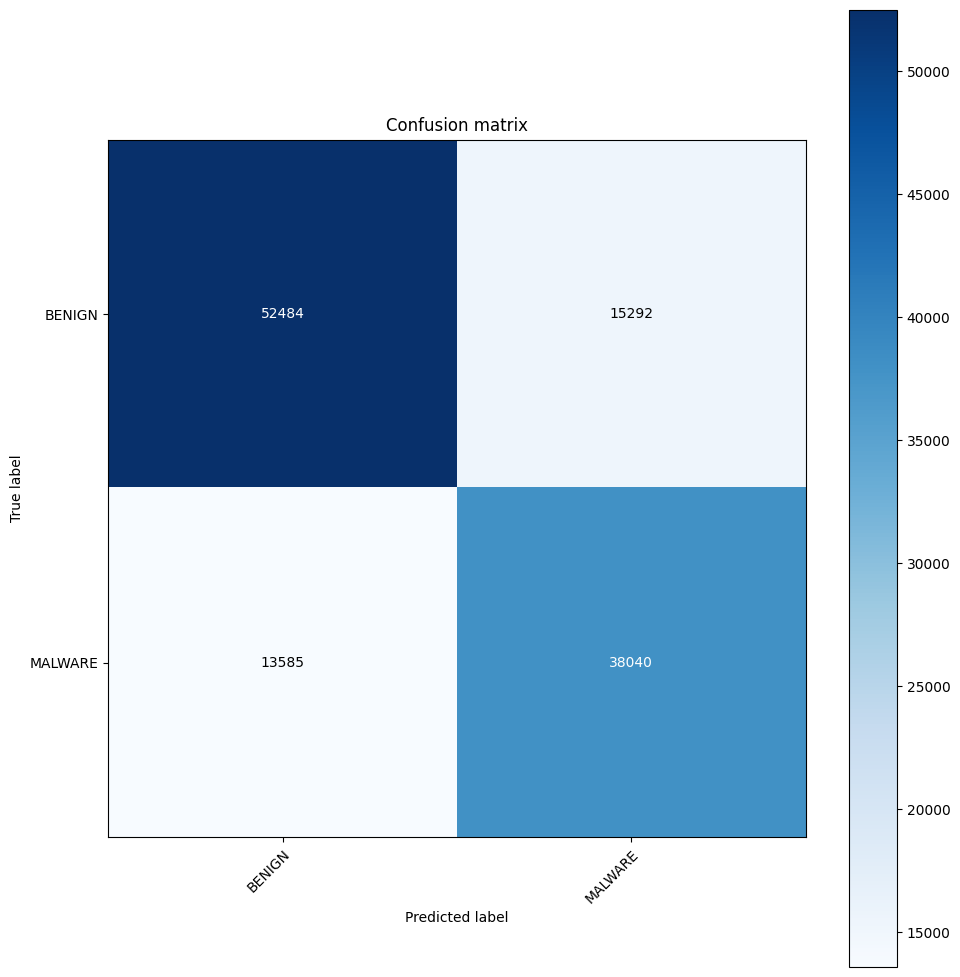

In [42]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    fig, ax = plt.subplots(figsize=(10, 10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(
        xticks=np.arange(cm.shape[1]),
        yticks=np.arange(cm.shape[0]),
        xticklabels=classes,
        yticklabels=classes,
        title=title,
        ylabel='True label',
        xlabel='Predicted label'
    )
    plt.setp(
        ax.get_xticklabels(),
        rotation=45,
        ha='right',
        rotation_mode='anchor'
    )
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt), ha='center', va='center', color='white' if cm[i, j] > thresh else 'black')
    fig.tight_layout()
    return ax

def valuate(clf, x_test, y_test):
    y_pred = clf.predict(x_test)
    print(classification_report(y_test, y_pred))
    plot_confusion_matrix(y_test, y_pred, classes=clf.classes_, title='Confusion matrix')
    #print(confusion_matrix(y_test, y_pred))

valuate(clf, X_test, y_test)

In [43]:
from sklearn.model_selection import cross_validate

scores = cross_validate(
    clf,
    X_train,
    y_train,
    cv=10,
    scoring=['precision_macro', 'recall_macro']
)

Precision: 0.75 (+/- 0.01)


In [45]:
print(f'{10}-fold cross validation:')
print('Precision: %0.2f (+/- %0.2f)' % (scores['test_precision_macro'].mean(), scores['test_precision_macro'].std() * 2))
print('Recall: %0.2f (+/- %0.2f)' % (scores['test_recall_macro'].mean(), scores['test_recall_macro'].std() * 2))

10-fold cross validation:
Precision: 0.75 (+/- 0.01)
Recall: 0.75 (+/- 0.01)
